In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptop/laptops_train.csv
/kaggle/input/laptop/laptops_test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df_test = pd.read_csv('/kaggle/input/laptop/laptops_test.csv', sep = ',')
df = pd.read_csv('/kaggle/input/laptop/laptops_train.csv', sep = ',')

In [4]:
df.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  
0                      NaN  1.37kg  11912523.48  
1                      NaN  1.34kg   7993374.48  
2                      NaN  1.86kg   5112900.00  
3                      NaN  1.83kg  22563005.40  
4                      NaN  1.37kg  16037611.20

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [6]:
df.describe()

Price
count  9.770000e+02
mean   1.001899e+07
std    6.306430e+06
min    1.706375e+06
25%    5.326308e+06
50%    8.527428e+06
75%    1.311570e+07
max    5.423231e+07

In [7]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [8]:
(df.isnull().sum()/len(df))

Manufacturer                0.000000
Model Name                  0.000000
Category                    0.000000
Screen Size                 0.000000
Screen                      0.000000
CPU                         0.000000
RAM                         0.000000
 Storage                    0.000000
GPU                         0.000000
Operating System            0.000000
Operating System Version    0.139202
Weight                      0.000000
Price                       0.000000
dtype: float64

In [9]:
df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])
df_test['Operating System Version']=df_test['Operating System Version'].fillna(df_test['Operating System Version'].mode()[0])

In [10]:
(df.isnull().sum()/len(df))

Manufacturer                0.0
Model Name                  0.0
Category                    0.0
Screen Size                 0.0
Screen                      0.0
CPU                         0.0
RAM                         0.0
 Storage                    0.0
GPU                         0.0
Operating System            0.0
Operating System Version    0.0
Weight                      0.0
Price                       0.0
dtype: float64

In [11]:
df.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  
0                       10  1.37kg  11912523.48  
1                       10  1.34kg   7993374.48  
2                       10  1.86kg   5112900.00  
3                       10  1.83kg  22563005.40  
4                       10  1.37kg  16037611.20

In [12]:
df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='s', value='', regex=True, inplace=True)

In [13]:
df['Weight'] = df['Weight'].astype("float64")
df_test['Weight'] = df_test['Weight'].astype("float64")

In [14]:
df.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  
0                       10    1.37  11912523.48  
1                       10    1.34   7993374.48  
2                       10    1.86   5112900.00  
3                       10    1.83  22563005.40  
4                       10    1.37  16037611.20

In [15]:
df['Model_name_avg'] = df.groupby(['Model Name'])['Price'].transform('median').round(2)
df['CPU_avg'] = df.groupby(['CPU'])['Price'].transform('median').round(2)
df['GPU_avg'] = df.groupby(['GPU'])['Price'].transform('median').round(2)

df_test['Model_name_avg'] = df_test.groupby(['Model Name'])['Price'].transform('median').round(2)
df_test['CPU_avg'] = df_test.groupby(['CPU'])['Price'].transform('median').round(2)
df_test['GPU_avg'] = df_test.groupby(['GPU'])['Price'].transform('median').round(2)

In [16]:
def group(value):
    if value >= 25000000:
        return 0
    elif value >= 20000000  and value < 25000000:
        return 1
    elif value >= 15000000  and value < 20000000:
        return 2
    elif value >= 10000000  and value < 15000000:
        return 3
    else:
        return 4

In [17]:
df.head(20)

Manufacturer         Model Name   Category Screen Size  \
0         Apple        MacBook Pro  Ultrabook       13.3"   
1         Apple        Macbook Air  Ultrabook       13.3"   
2            HP             250 G6   Notebook       15.6"   
3         Apple        MacBook Pro  Ultrabook       15.4"   
4         Apple        MacBook Pro  Ultrabook       13.3"   
5          Acer           Aspire 3   Notebook       15.6"   
6         Apple        MacBook Pro  Ultrabook       15.4"   
7         Apple        Macbook Air  Ultrabook       13.3"   
8          Asus    ZenBook UX430UN  Ultrabook       14.0"   
9          Acer            Swift 3  Ultrabook       14.0"   
10           HP             250 G6   Notebook       15.6"   
11           HP             250 G6   Notebook       15.6"   
12        Apple        MacBook Pro  Ultrabook       15.4"   
13         Dell      Inspiron 3567   Notebook       15.6"   
14        Apple        MacBook 12"  Ultrabook       12.0"   
15        Apple        MacBook Pro  Ultrabook       13.3"   
16         Dell      Inspiron 3567   Notebook       15.6"   
17        Apple        MacBook Pro  Ultrabook       15.4"   
18       Lenovo  IdeaPad 320-15IKB   Notebook       15.6"   
19         Dell             XPS 13  Ultrabook       13.3"   

                                       Screen                         CPU  \
0          IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
1                                    1440x900        Intel Core i5 1.8GHz   
2                           Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
3          IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
4          IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   
5                                    1366x768     AMD A9-Series 9420 3GHz   
6          IPS Panel Retina Display 2880x1800        Intel Core i7 2.2GHz   
7                                    1440x900        Intel Core i5 1.8GHz   
8                           Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   
9                 IPS Panel Full HD 1920x1080  Intel Core i5 8250U 1.6GHz   
10                                   1366x768  Intel Core i5 7200U 2.5GHz   
11                          Full HD 1920x1080    Intel Core i3 6006U 2GHz   
12         IPS Panel Retina Display 2880x1800        Intel Core i7 2.8GHz   
13                          Full HD 1920x1080    Intel Core i3 6006U 2GHz   
14         IPS Panel Retina Display 2304x1440      Intel Core M m3 1.2GHz   
15         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
16                          Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   
17         IPS Panel Retina Display 2880x1800        Intel Core i7 2.9GHz   
18                          Full HD 1920x1080  Intel Core i3 7100U 2.4GHz   
19  IPS Panel Full HD / Touchscreen 1920x1080  Intel Core i5 8250U 1.6GHz   

     RAM              Storage                           GPU Operating System  \
0    8GB            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1    8GB  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2    8GB            256GB SSD         Intel HD Graphics 620            No OS   
3   16GB            512GB SSD            AMD Radeon Pro 455            macOS   
4    8GB            256GB SSD  Intel Iris Plus Graphics 650            macOS   
5    4GB            500GB HDD                 AMD Radeon R5          Windows   
6   16GB  256GB Flash Storage       Intel Iris Pro Graphics           Mac OS   
7    8GB  256GB Flash Storage        Intel HD Graphics 6000            macOS   
8   16GB            512GB SSD          Nvidia GeForce MX150          Windows   
9    8GB            256GB SSD        Intel UHD Graphics 620          Windows   
10   4GB            500GB HDD         Intel HD Graphics 620            No OS   
11   4GB            500GB HDD         Intel HD Graphics 520            No OS   
12  16GB            256GB SSD            AMD Radeon Pro 555    

In [18]:
df['model_name_group'] = df.apply(lambda x: group(x['Model_name_avg']),axis=1)
df['cpu_group'] = df.apply(lambda x: group(x['CPU_avg']),axis=1)
df['gpu_group'] = df.apply(lambda x: group(x['GPU_avg']),axis=1)

df_test['model_name_group'] = df_test.apply(lambda x: group(x['Model_name_avg']),axis=1)
df_test['cpu_group'] = df_test.apply(lambda x: group(x['CPU_avg']),axis=1)
df_test['gpu_group'] = df_test.apply(lambda x: group(x['GPU_avg']),axis=1)

In [19]:
df.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  Model_name_avg      CPU_avg  \
0                       10    1.37  11912523.48     17779109.40  12707735.04   
1                       10    1.34   7993374.48      9148267.44   9148267.44   
2                       10    1.86   5112900.00      3902209.74   7380360.00   
3                       10    1.83  22563005.40     17779109.40  22563005.40   
4                       10    1.37  16037611.20     17779109.40  17088645.60   

      GPU_avg  model_name_group  cpu_group  gpu_group  
0  15996708.0                 2          3          2  
1   9323262.0                 4          4          4  
2   9194328.0                 4          4          4  
3  22563005.4                 2          1          1  
4  17088645.6                 2          2          2

In [20]:
df = df.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)
df_test = df_test.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)

In [21]:
df.head()

Manufacturer   Category Screen Size                              Screen  \
0        Apple  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600   
1        Apple  Ultrabook       13.3"                            1440x900   
2           HP   Notebook       15.6"                   Full HD 1920x1080   
3        Apple  Ultrabook       15.4"  IPS Panel Retina Display 2880x1800   
4        Apple  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600   

    RAM              Storage Operating System Operating System Version  \
0   8GB            128GB SSD            macOS                       10   
1   8GB  128GB Flash Storage            macOS                       10   
2   8GB            256GB SSD            No OS                       10   
3  16GB            512GB SSD            macOS                       10   
4   8GB            256GB SSD            macOS                       10   

   Weight        Price  model_name_group  cpu_group  gpu_group  
0    1.37  11912523.48                 2          3          2  
1    1.34   7993374.48                 4          4          4  
2    1.86   5112900.00                 4          4          4  
3    1.83  22563005.40                 2          1          1  
4    1.37  16037611.20                 2          2          2

In [22]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Category')
sns.countplot(x = 'Category', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Ram')
sns.countplot(x = 'RAM', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Operating System')
sns.countplot(x = 'Operating System', palette = 'Set2', data = df)

plt.subplot(2, 2, 4)
plt.gca().set_title('Operating System Version')
sns.countplot(x = 'Operating System Version', palette = 'Set2', data = df)

<AxesSubplot:title={'center':'Operating System Version'}, xlabel='Operating System Version', ylabel='count'>

In [23]:
plt.figure(figsize = (15,10))

sns.set(color_codes = True)

plt.subplot(2,1,1)
sns.histplot(df['Weight'], kde = False)

plt.subplot(2,1,2)
sns.histplot(df.Price, kde = False)

<AxesSubplot:xlabel='Price', ylabel='Count'>

<AxesSubplot:xlabel='Operating System Version', ylabel='Price'>

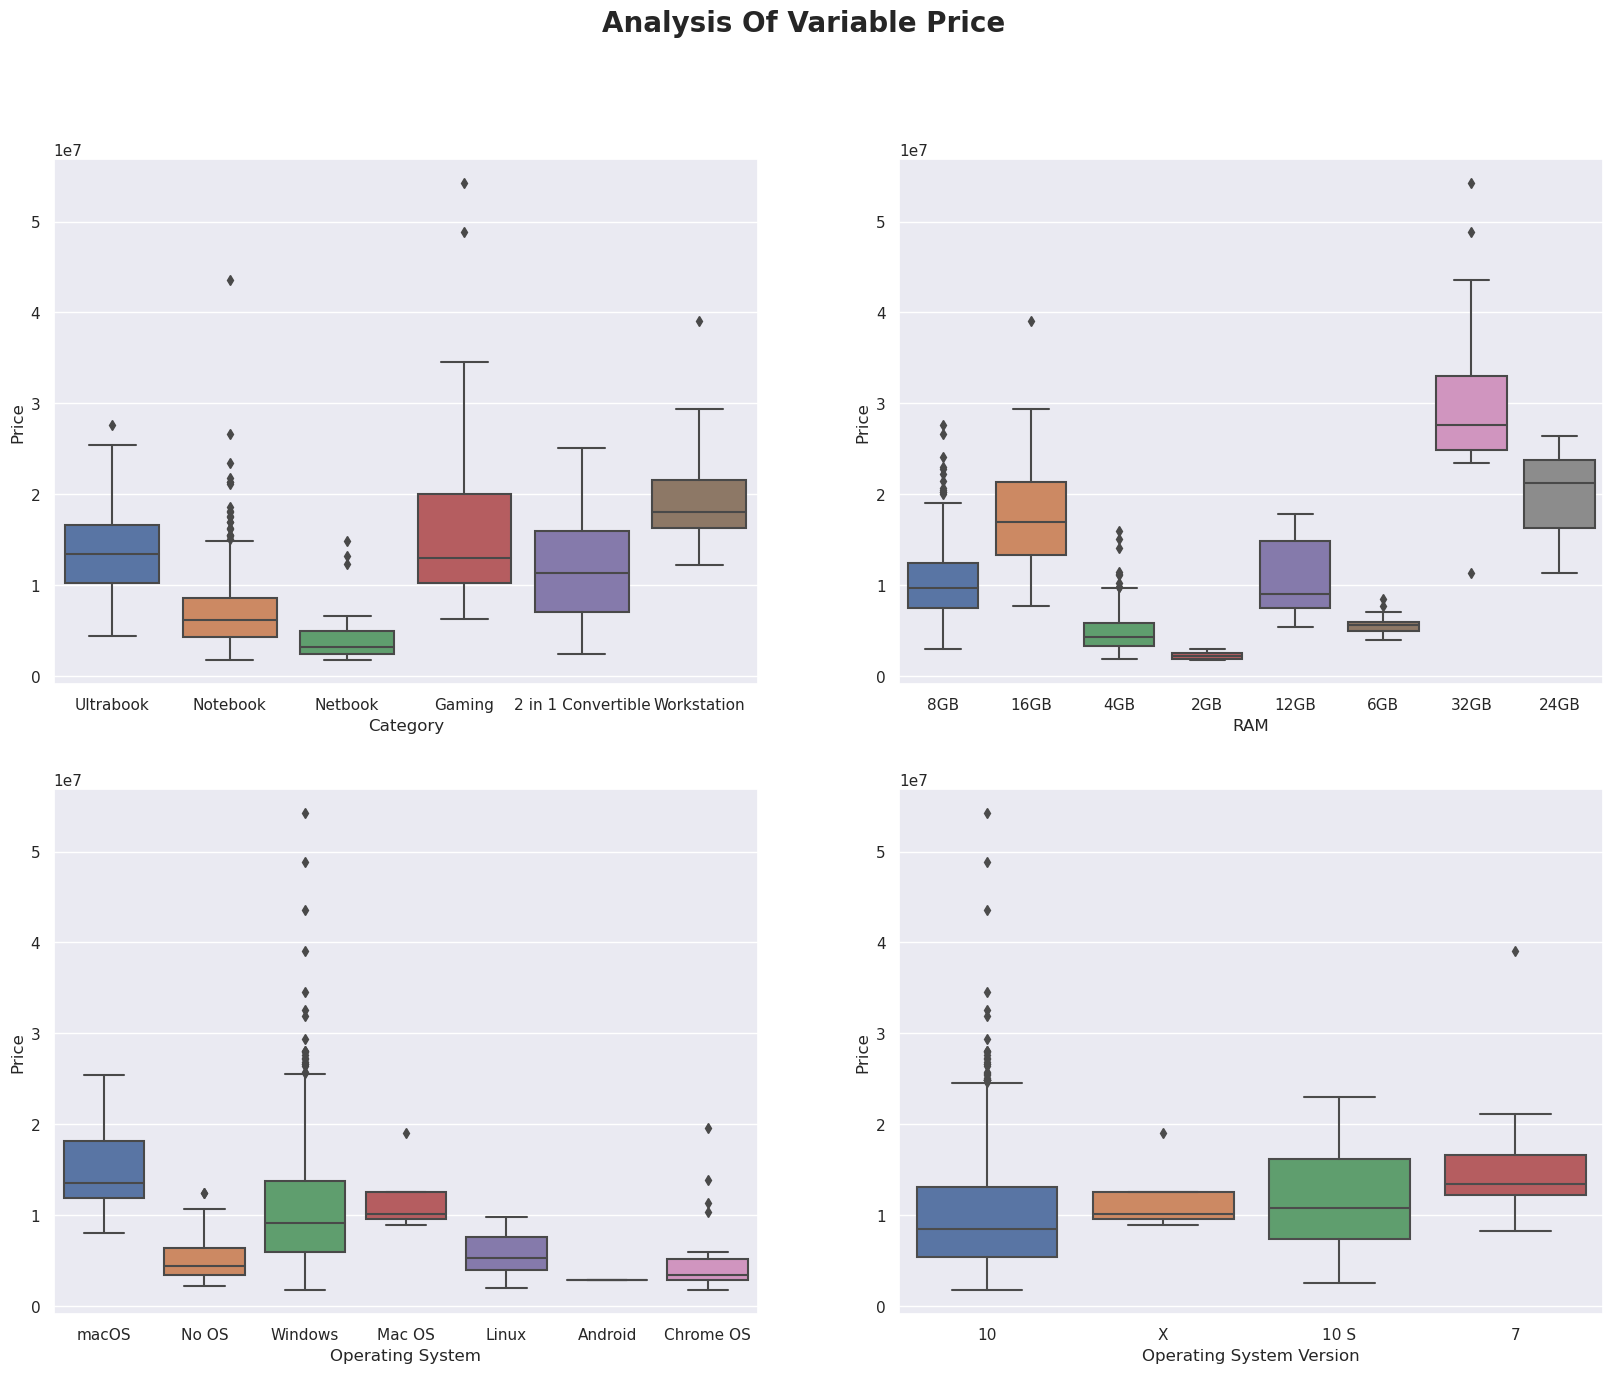

In [24]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable Price",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(x="Category", y="Price", data=df)

plt.subplot(2,2,2)
sns.boxplot(x="RAM", y="Price", data=df)

plt.subplot(2,2,3)
sns.boxplot(x="Operating System", y="Price", data=df)

plt.subplot(2,2,4)
sns.boxplot(x="Operating System Version", y="Price", data=df)

In [25]:
sns.scatterplot(data=df, x="Weight", y="Price")

<AxesSubplot:xlabel='Weight', ylabel='Price'>

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Manufacturer = LabelEncoder()
label_encoder_Category = LabelEncoder()
label_encoder_Screen_Size = LabelEncoder()
label_encoder_Screen = LabelEncoder()
label_encoder_RAM = LabelEncoder()
label_encoder_Storage = LabelEncoder()
label_encoder_Operating_System = LabelEncoder()
label_encoder_Operating_System_Version = LabelEncoder()

df['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df['Manufacturer'])
df['Category'] = label_encoder_Category.fit_transform(df['Category'])
df['Screen Size'] = label_encoder_Screen_Size.fit_transform(df['Screen Size'])
df['Screen'] = label_encoder_Screen.fit_transform(df['Screen'])
df['RAM'] = label_encoder_RAM.fit_transform(df['RAM'])
df[' Storage'] = label_encoder_Storage.fit_transform(df[' Storage'])
df['Operating System'] = label_encoder_Operating_System.fit_transform(df['Operating System'])
df['Operating System Version'] = label_encoder_Operating_System_Version.fit_transform(df['Operating System Version'])

df_test['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df_test['Manufacturer'])
df_test['Category'] = label_encoder_Category.fit_transform(df_test['Category'])
df_test['Screen Size'] = label_encoder_Screen_Size.fit_transform(df_test['Screen Size'])
df_test['Screen'] = label_encoder_Screen.fit_transform(df_test['Screen'])
df_test['RAM'] = label_encoder_RAM.fit_transform(df_test['RAM'])
df_test[' Storage'] = label_encoder_Storage.fit_transform(df_test[' Storage'])
df_test['Operating System'] = label_encoder_Operating_System.fit_transform(df_test['Operating System'])
df_test['Operating System Version'] = label_encoder_Operating_System_Version.fit_transform(df_test['Operating System Version'])

In [27]:
df.head(10)

Manufacturer  Category  Screen Size  Screen  RAM   Storage  \
0             1         4            7      23    7         2   
1             1         4            7       1    7         0   
2             7         3           14       8    7        15   
3             1         4           13      25    1        27   
4             1         4            7      23    7        15   
5             0         3           14       0    5        24   
6             1         4           13      25    1        14   
7             1         4            7       1    7        14   
8             2         4           10       8    1        27   
9             0         4           10      15    7        15   

   Operating System  Operating System Version  Weight        Price  \
0                 6                         0    1.37  11912523.48   
1                 6                         0    1.34   7993374.48   
2                 4                         0    1.86   5112900.00   
3                 6                         0    1.83  22563005.40   
4                 6                         0    1.37  16037611.20   
5                 5                         0    2.10   3556800.00   
6                 3                         3    2.04  19028613.24   
7                 6                         0    1.34  10303160.40   
8                 5                         0    1.30  13293540.00   
9                 5                         0    1.60   6846840.00   

   model_name_group  cpu_group  gpu_group  
0                 2          3          2  
1                 4          4          4  
2                 4          4          4  
3                 2          1          1  
4                 2          2          2  
5                 4          4          4  
6                 2          2          2  
7                 4          4          4  
8                 3          4          4  
9                 4          4          4

In [28]:
X_train = df.drop('Price', axis = 1)
X_train = X_train.values
y_train = df['Price']
X_test = df_test.drop('Price', axis = 1)
X_test = X_test.values
y_test = df_test['Price']

In [29]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard_train = scaler.fit_transform(X_train)
y_standard_train = scaler.fit_transform(y_train.values.reshape(-1,1))
X_standard_test = scaler.fit_transform(X_test)
y_standard_test = scaler.fit_transform(y_test.values.reshape(-1,1))

In [30]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_normal_score_train = lr_model.score(X_train, y_train)
lr_normal_score_test = lr_model.score(X_test, y_test)
previsoes = lr_model.predict(X_test)
mae_lr_normal = mean_absolute_error(y_test, previsoes)
rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))
prediction = lr_model.predict(X_test)
from sklearn.metrics import r2_score 
a=r2_score(y_test, prediction)

print('Train :', lr_normal_score_train)
print('Test :', lr_normal_score_test)
print('Mean Absolute Error :', mae_lr_normal)
print('Root Mean Square Error :', rmse_lr_normal)
print('r2_score',a)

Train : 0.8387595187152533
Test : 0.7935316574237211
Mean Absolute Error : 1953117.081047944
Root Mean Square Error : 2696368.1093766172
r2_score 0.7935316574237211


In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, 
max_depth= 7,  criterion = 'squared_error', random_state = 0)
regressor_rf.fit(X_train, y_train)
lr_normal_rf = regressor_rf.score(X_train, y_train)
lr_normal_rf_test = regressor_rf.score(X_test, y_test)
previsoes = regressor_rf.predict(X_test)
mae_lr_normal_rf  = mean_absolute_error(y_test, previsoes)
rmse_lr_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))

print('Train :', lr_normal_rf)
print('Test :', lr_normal_rf_test)
print('Mean Absolute Error :', mae_lr_normal_rf)
print('Root Mean Square Error :', rmse_lr_normal_rf)

Train : 0.957658607401638
Test : 0.8180228352184167
Mean Absolute Error : 1816206.923974398
Root Mean Square Error : 2531400.68590522
